# 

**Количество человек в группе от 3 до 5**

Общее требование к заданию 

1) Продумать клиент-серверную архитектуру приложения (десктоп приложение на Python или Electron) и сервер баз данных (Postgre) согласно заданной предметной области

2) Реализовать клиент-серверное приложение согласно заданной предметной области

3) Реализовать mvc-подобный шаблон проектирования в приложении (разделить данные, представление и обработку данных на отдельные модули/классы, организовать взаимодействие между ними)

4) Реализовать логику обработки  (бизнес логику приложения) данных на клиенте (вычисление, модификация, агрегация данных, отправка изменённых данных на сервер)

5) Реализовать юнит тесты

6) Провести тестирование и отладку приложения


# Проект 1: Система управления библиотекой (ПРИМЕРНОЕ ТЗ)

СЕРВЕР - ЛОКАЛЬНАЯ ПРОГРАММА


Описание: Приложение для управления библиотечными ресурсами, позволяющее пользователям брать книги, возвращать их, а библиотекарям — управлять каталогом и отслеживать статус книг.

1. Клиент архитектура

Клиент: Десктопное консольное приложение на Python с использованием библиотеки prompt_toolkit для интерактивного интерфейса.

База данных: PostgreSQL с таблицами:
- books (id, title, author, isbn, status, available_copies)
- users (id, name, email, role)
- borrows (id, user_id, book_id, borrow_date, return_date)

1. Реализация клиент-серверного приложения

Клиент:
- Отображение списка книг, фильтрация по автору или названию.
- Возможность брать/возвращать книги, просматривать историю заимствований.

Роли: библиотекарь (добавление/удаление книг) и читатель (заимствование/возврат).

База данных:
- Использование SQLAlchemy для ORM.
- Миграции через Alembic для управления схемой базы данных.



1. MVC-подобный шаблон

Model:
- Классы Book, User, Borrow для представления данных.
- Взаимодействие с сервером через HTTP-запросы для получения/обновления данных.


View:
- Консольный интерфейс с меню и таблицами (используя tabulate для отображения данных).
- Методы для отображения списков книг, пользователей, заимствований.

Controller:
- Класс LibraryController, который обрабатывает ввод пользователя, вызывает методы модели для обработки данных и обновляет представление.

Пример: метод borrow_book(user_id, book_id) проверяет доступность книги, отправляет запрос на сервер и обновляет UI.



4. Бизнес-логика на клиенте


**Вычисления**: Подсчёт количества доступных копий книги на основе данных с сервера.

**Модификация**: Формирование запроса на заимствование/возврат книги с проверкой статуса (например, нельзя взять книгу, если нет доступных копий).

**Агрегация**: Составление отчёта о просроченных возвратах (например, фильтрация заимствований с return_date < today).

**Отправка данных**: Отправка обновлённых данных (например, статуса книги) на сервер через POST/PATCH-запросы.

5. Юнит-тесты

Фреймворк: pytest.

Тесты:

**Модель:** проверка корректности ответов от сервера(локальной программы).
**Контроллер:** тестирование логики заимствования (например, нельзя взять книгу, если available_copies == 0).
**Представление:** проверка форматирования таблиц для вывода в консоль.


Моки: Использование unittest.mock для эмуляции HTTP-запросов к серверу.

1. Тестирование и отладка

- Интеграционное тестирование: Проверка взаимодействия клиента и сервера (например, успешное создание записи в borrows при заимствовании).
- Нагрузочное тестирование: Отправка множества запросов на сервер для проверки производительности (с использованием locust).
- Отладка: Использование pdb для пошагового выполнения кода клиента и logging для отслеживания ошибок на сервере.

Сценарии тестирования:
- Попытка взять книгу, которой нет в наличии.
- Добавление книги библиотекарем с некорректным ISBN.
- Проверка отображения отчёта о просроченных возвратах.


# Проект 2: Система бронирования мест в кинотеатре
Описание: Приложение для бронирования мест в кинотеатре, позволяющее пользователям выбирать сеансы, бронировать места и оплачивать билеты.

1. Клиент-серверная архитектура

**Клиент**: Консольное приложение на Python с использованием curses для интерактивного интерфейса.

**Сервер**: Python-сервер на Django REST Framework, предоставляющий API для работы с сеансами, местами и бронированиями.

**База данных**: PostgreSQL с таблицами:
- movies (id, title, duration, genre)
- sessions (id, movie_id, hall_id, start_time)
- seats (id, session_id, row, number, status)
- bookings (id, user_id, session_id, seat_id, payment_status)


Протокол: HTTP с JSON. Аутентификация через API-ключи.

2. Реализация клиент-серверного приложения

**Клиент**:
- Отображение списка сеансов и доступных мест.
- Возможность выбрать место и забронировать его.


**Сервер**:
**Endpoints**: /movies, /sessions, /seats, /bookings (CRUD).

Логика проверки доступности мест (например, нельзя забронировать уже занятое место).


**База данных**:
- Использование Django ORM.
- Транзакции для обеспечения атомарности бронирования.



1. MVC-подобный шаблон

Model:
- Классы Movie, Session, Seat, Booking для представления данных.
- Методы для получения данных с сервера и их локального кэширования.


View:
- Консольный интерфейс с визуализацией зала (сетка мест с индикацией статуса).
- Методы для отображения сеансов и бронирований.


Controller:
- Класс BookingController, управляющий процессом бронирования.
- Пример: метод book_seat(session_id, seat_id) проверяет доступность места, отправляет запрос на сервер и обновляет UI.



4. Бизнес-логика на клиенте

**Вычисления**: Подсчёт общей стоимости бронирования (на основе количества мест и их категории).
**Модификация**: Проверка статуса места перед бронированием (например, "свободно" или "занято").
**Агрегация**: Формирование списка забронированных мест для пользователя.
**Отправка данных**: Отправка данных о бронировании на сервер через POST-запросы.

5. Юнит-тесты

**Фреймворк**: pytest.
Тесты:

- Модель: проверка парсинга данных о сеансах и местах.
- Контроллер: тестирование логики бронирования (например, нельзя забронировать занятое место).
- Представление: проверка корректности отображения сетки мест.
- Моки: Использование responses для эмуляции API-ответов.

6. Тестирование и отладка

**Интеграционное тестирование**: Проверка полного цикла бронирования (от выбора места до создания записи в bookings).
**Нагрузочное тестирование**: Проверка одновременного бронирования мест несколькими пользователями.
**Отладка**: Использование curses-отладчика и Django-логов.
**Сценарии тестирования**:
- Попытка забронировать занятое место.
- Выбор сеанса, который уже начался.
- Проверка отображения сетки мест после бронирования.





UML - диаграмма базы данных(Пример)

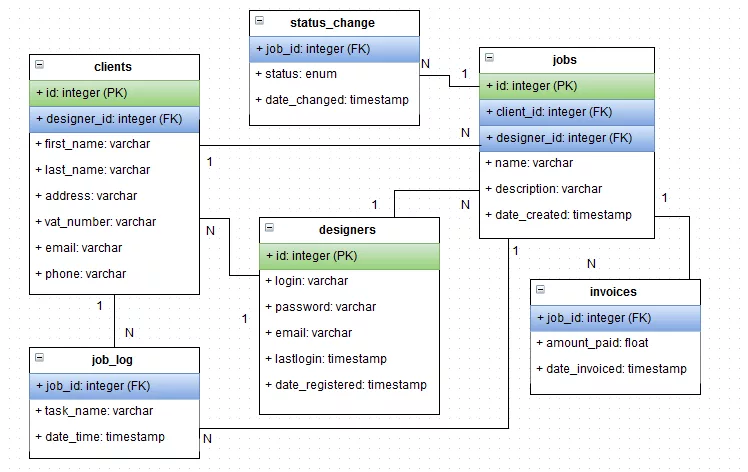